In [102]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [103]:
mnist_data_raw = loadmat('./mnist-original.mat')

In [104]:
mnist_data = {
    'data': mnist_data_raw['data'].T,
    'target': mnist_data_raw['label'][0],
}

In [105]:
x,y = mnist_data['data'], mnist_data['target']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(56000, 784) (56000,)
(14000, 784) (14000,)


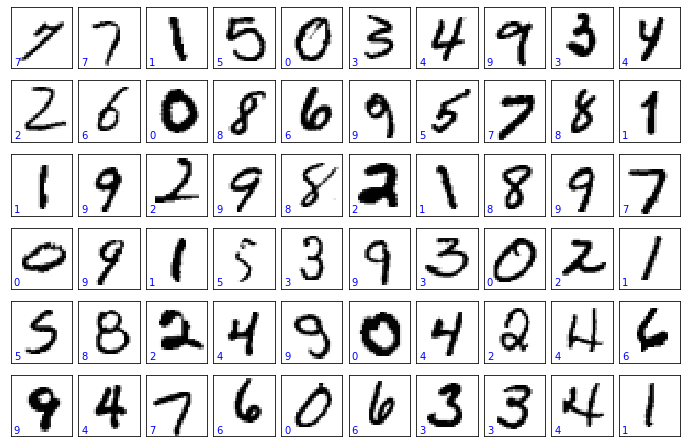

In [107]:
fig, ax = plt.subplots(
    6, 10, figsize=(12, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1),
    )
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    axi.text(0.05, 0.05, str(int(y_train[i])), transform=axi.transAxes, color='blue')
plt.show()

In [108]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=0.0001, solver='adam', verbose=10, tol=0.0001, random_state=1)

In [109]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Iteration 1, loss = 3.36255396
Iteration 2, loss = 1.11594848
Iteration 3, loss = 0.64538181
Iteration 4, loss = 0.41837856
Iteration 5, loss = 0.28581943
Iteration 6, loss = 0.21787733
Iteration 7, loss = 0.17454738
Iteration 8, loss = 0.14092195
Iteration 9, loss = 0.12596579
Iteration 10, loss = 0.11928030
Iteration 11, loss = 0.11468360
Iteration 12, loss = 0.10186135
Iteration 13, loss = 0.09893472
Iteration 14, loss = 0.09890192
Iteration 15, loss = 0.09505547
Iteration 16, loss = 0.09221760
Iteration 17, loss = 0.09776105
Iteration 18, loss = 0.08325322
Iteration 19, loss = 0.08786691
Iteration 20, loss = 0.07911137
Iteration 21, loss = 0.07070242
Iteration 22, loss = 0.06249958
Iteration 23, loss = 0.07202811
Iteration 24, loss = 0.07881681
Iteration 25, loss = 0.07929551
Iteration 26, loss = 0.07196814
Iteration 27, loss = 0.05989991
Iteration 28, loss = 0.06454003
Iteration 29, loss = 0.06723725
Iteration 30, loss = 0.06720211
Iteration 31, loss = 0.06418659
Iteration 32, los

c:\Users\King\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
accuracy = accuracy_score(y_test, y_pred)*100
print("accuracy = %.3f" %accuracy,"%")

accuracy = 96.514 %


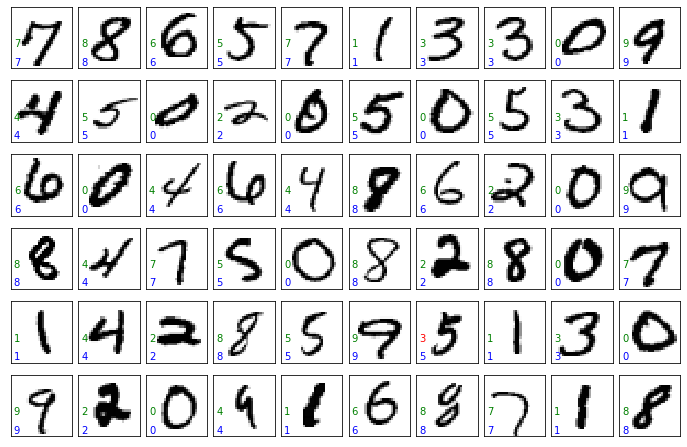

In [114]:
fig, ax = plt.subplots(
    6, 10, figsize=(12, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1),
    )
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    axi.text(0.05, 0.05, str(int(y_test[i])), transform=axi.transAxes, color='blue')
    axi.text(0.05, 0.35, str(int(y_pred[i])), transform=axi.transAxes, color='green' if int(y_pred[i]) == int(y_test[i]) else 'red')
plt.show()